In [1]:
# 기본 패키지 불러오기 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns 
import matplotlib as mpl
from matplotlib import font_manager, rc

# 그래프를 노트북 안에 그리기 위해 설정
%matplotlib inline

# 글꼴 경로 지정
font_path = '../../../../data/malgun.ttf'  # 윈도우에 설치된 맑은 고딕 폰트 경로

# 폰트 이름 얻어오기
font_name = font_manager.FontProperties(fname=font_path).get_name()

# matplotlib의 rc(run command) 기능을 이용하여 글꼴 설정
mpl.rc('font', family=font_name)

# 유니코드에서  음수 부호 설정
mpl.rc('axes', unicode_minus=False)

In [2]:
# 데이터 불러오기

path = '../../../../data/Airbnb_London/listings.csv'

london_lists = pd.read_csv(path)

# 1차 선별한 컬럼 25개 중 22개 2차 선별 + 1개(숙소_예약가능_여부)
# 최근 리뷰가 작성되었는지를 보기 위해 2개 컬럼 추가_240529 >> 'number_of_reviews_ltm' // 'last_review'
# URL 컬럼 london_lists에 적용_240530

columns_selected = ['id', 'listing_url', 'host_id', 'host_is_superhost', 'neighbourhood_cleansed', 'property_type', \
    'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'amenities', 'price', 'has_availability', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'last_review', 'review_scores_rating', 'review_scores_accuracy', \
    'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'reviews_per_month']

# 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_total_listings_count', 'host_has_profile_pic', 'host_identity_verified', 'minimum_nights', 'maximum_nights', 'has_availability',

# 선별한 컬럼만 적용
london_lists = london_lists[columns_selected]

# 변수 정리 
london_lists = london_lists.rename(columns={
    'id': '숙소_id',
    'listing_url' : '숙소_url',
    'host_id': '호스트_id',
    # 'host_response_time': '답변_평균시간',
    # 'host_response_rate': '문의_응답률',
    # 'host_acceptance_rate': '예약_수락률',
    'host_is_superhost': '슈퍼호스트',
    # 'host_total_listings_count': '숙소_수',
    # 'host_has_profile_pic' : '프로필_사진',
    # 'host_identity_verified' : '호스트_신원',
    'neighbourhood_cleansed': '숙소_지역',
    'property_type' : '숙소_특징',
    'room_type': '숙소_유형',
    'accommodates': '수용_인원수',
    'bathrooms': '욕실수',
    'bedrooms': '침실수',
    'beds': '침대수',
    'amenities': '편의시설',
    'price': '숙소_가격',
    # 'minimum_nights': '최소_숙박일',
    # 'maximum_nights': '최대_숙박일',
    'has_availability' : '예약_가능여부',
    'number_of_reviews': '리뷰수',
    'number_of_reviews_ltm' : '12개월_리뷰수',
    'number_of_reviews_l30d': '30일_리뷰수',
    'last_review' : '마지막_리뷰',
    'review_scores_rating': '리뷰점수',
    'review_scores_accuracy': '숙소_정확성_리뷰점수',
    'review_scores_cleanliness': '숙소_청결도_리뷰점수',
    'review_scores_checkin': '숙소_체크인_리뷰점수',
    'review_scores_communication': '숙소_소통_리뷰점수',
    'review_scores_location': '숙소_위치_리뷰점수',
    'review_scores_value': '숙소_가격_리뷰점수',
    'reviews_per_month': '평균_리뷰수'
 
})

temp = london_lists.copy()
raw = london_lists.copy()

# 컬럼명 확인
london_lists.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90852 entries, 0 to 90851
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   숙소_id        90852 non-null  int64  
 1   숙소_url       90852 non-null  object 
 2   호스트_id       90852 non-null  int64  
 3   슈퍼호스트        90463 non-null  object 
 4   숙소_지역        90852 non-null  object 
 5   숙소_특징        90852 non-null  object 
 6   숙소_유형        90852 non-null  object 
 7   수용_인원수       90852 non-null  int64  
 8   욕실수          57894 non-null  float64
 9   침실수          78118 non-null  float64
 10  침대수          57837 non-null  float64
 11  편의시설         90852 non-null  object 
 12  숙소_가격        57885 non-null  object 
 13  예약_가능여부      86773 non-null  object 
 14  리뷰수          90852 non-null  int64  
 15  12개월_리뷰수     90852 non-null  int64  
 16  30일_리뷰수      90852 non-null  int64  
 17  마지막_리뷰       65869 non-null  object 
 18  리뷰점수         65869 non-null  float64
 19  숙소_정

In [3]:
# 리뷰수가 0인 컬럼 조건 
condition_review_0 = london_lists['리뷰수'] == 0

# 별도의 DF로 저장
london_lists_review_0 = london_lists[condition_review_0]

# 리뷰 개수가 0이 아닌 컬럼 조건 설정
condition_review = london_lists['리뷰수'] != 0

# 리뷰 개수가 0이 아닌 컬럼으로 df 업데이트 
london_lists = london_lists[condition_review]
temp = london_lists.copy()

#숙소 유형 제거 
# 조건 설정
condition_room_entirehomeapt = london_lists['숙소_유형'] == 'Entire home/apt'
condition_room_privateroom = london_lists['숙소_유형'] == 'Private room'

# 데이터 제거
london_lists = london_lists[(condition_room_entirehomeapt | condition_room_privateroom)]

# 예약가능여부 결측치 제거
london_lists = london_lists[london_lists["예약_가능여부"].notnull()]


# 가격이 null값/notnull값 조건 생성 
condition_price_notnull = london_lists['숙소_가격'].notnull()
condition_price_null = london_lists['숙소_가격'].isnull()

# 가격이 null값/null값이 아닌 df 분리
london_lists_price = london_lists[condition_price_notnull] 
london_lists_price_null = london_lists[condition_price_null]

# 변수명 정리 널값이 아닌 데이터
london_lists = london_lists_price

#슈퍼호스트 결측치 제거
london_lists = london_lists.dropna(subset=['슈퍼호스트'])

#욕실,침대,침실수 결측츠제거
london_lists = london_lists.dropna(subset=['욕실수', '침실수', '침대수'])

#리뷰점수 결측치제거
london_lists = london_lists.dropna(subset=['숙소_정확성_리뷰점수', '숙소_청결도_리뷰점수', '숙소_체크인_리뷰점수', '숙소_소통_리뷰점수', '숙소_위치_리뷰점수', '숙소_가격_리뷰점수'])

#12개월 리뷰수 0인것 제거 
london_lists = london_lists[london_lists['12개월_리뷰수'] != 0]

london_lists['숙소_가격'] = london_lists['숙소_가격'].str.lstrip('$').str.replace(',', '').astype('float')

#가격이 0 인값 제거 
london_lists = london_lists[london_lists['숙소_가격'] != 0.0]

# 슈퍼호스트를 f로 바꿈 
london_lists.loc[(london_lists['슈퍼호스트'] == 't') & (london_lists['리뷰점수'] < 4.8), '슈퍼호스트'] = 'f'

#게스트 선호 컬럼 추가 
# 새로운 '게스트선호' 컬럼을 추가하고 기본값으로 'f' 설정
london_lists['게스트선호'] = 'f'
# 조건에 맞는 행의 '게스트선호' 값을 't'로 변경
london_lists.loc[(london_lists['리뷰점수'] >= 4.9) & (london_lists['리뷰수'] >= 5) & (london_lists['슈퍼호스트'] == 't'), '게스트선호'] = 't'


In [4]:
london_lists.shape

(38769, 27)

이상치 처리 

In [5]:
#수용 인원수 이상치 제거 

import pandas as pd


# 이상치를 제거하는 함수 정의
def remove_price_outliers(df, price_column, type):
    
    condition = (df['숙소_유형'] == type)
    
    if price_column != '숙소_가격':
        Q1 = df[price_column].quantile(0.25)
        Q3 = df[price_column].quantile(0.75)
        IQR = Q3 - Q1
        upper_bound = Q3 + 1.5 * IQR

        
        outlier = df[price_column][condition] > upper_bound
        upper_outlier = df[condition][outlier]
        
        upper_outlier_indices = upper_outlier.index
        london_lists_cleaned = df.drop(index=upper_outlier_indices, inplace=True)
        df = london_lists_cleaned
        return df 
    else:
        Q1 = df[price_column].quantile(0.25)
        Q3 = df[price_column].quantile(0.75)
        IQR = Q3 - Q1
        upper_bound = Q3 + 3 * IQR

        
        outlier = df[price_column][condition] > upper_bound
        upper_outlier = df[condition][outlier]
        
        upper_outlier_indices = upper_outlier.index
        london_lists_cleaned = df.drop(index=upper_outlier_indices, inplace=True)
        df = london_lists_cleaned
        return df 
# 숙소 가격의 이상치 제거
remove_price_outliers(london_lists, '수용_인원수', 'Entire home/apt')
remove_price_outliers(london_lists, '수용_인원수', 'Private room')
remove_price_outliers(london_lists, '숙소_가격', 'Entire home/apt')
remove_price_outliers(london_lists, '숙소_가격', 'Private room')



In [6]:
london_lists.shape # 36407개가 되어야함

(36407, 27)

In [11]:
# 상관계수에 불필요한 컬럼들 제거
london_lists_clean = london_lists.drop(columns=['숙소_id', '호스트_id', '숙소_url', '편의시설','예약_가능여부','마지막_리뷰',
                            '슈퍼호스트','숙소_지역', '숙소_유형','숙소_특징','게스트선호'])

In [13]:
london_lists_clean_corr = london_lists_clean.corr()

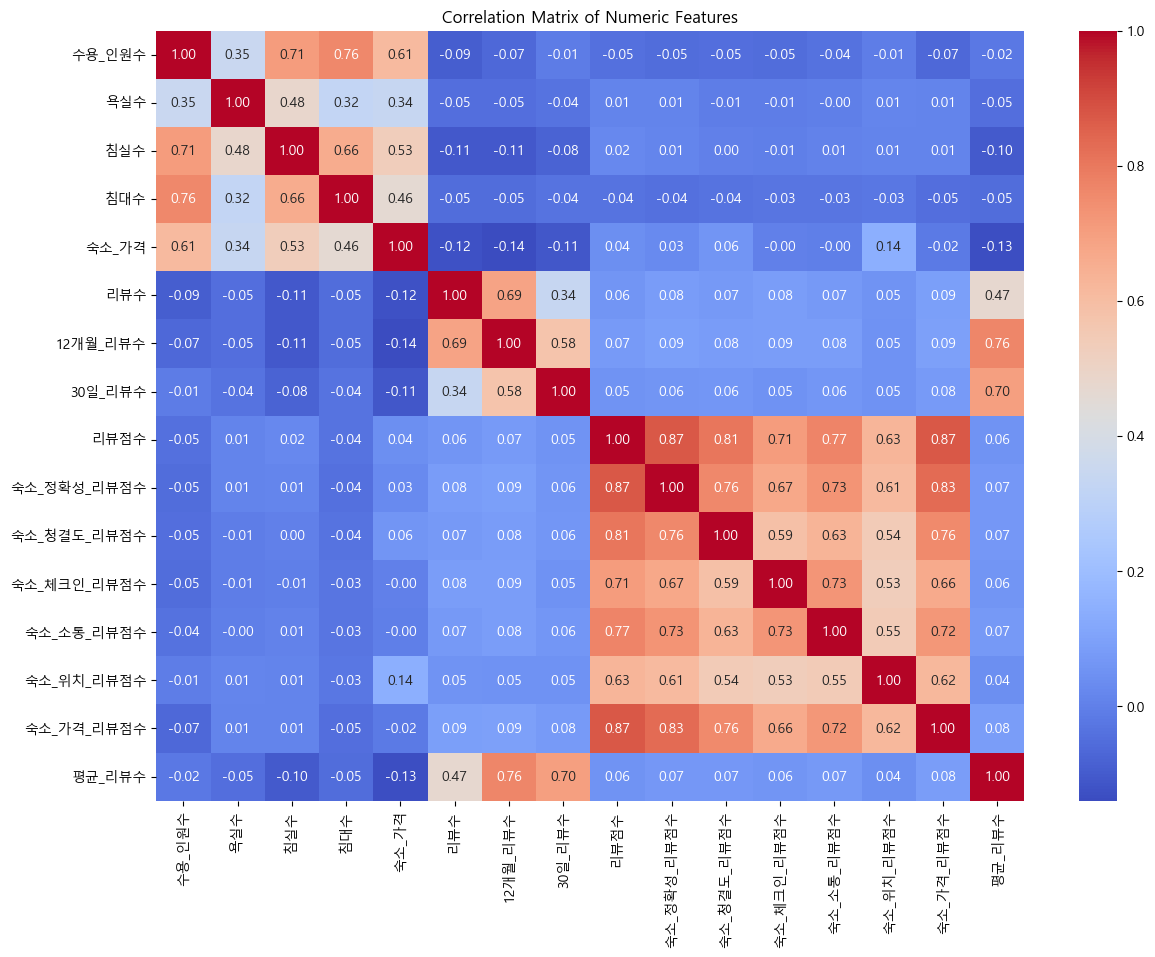

In [14]:
# 히트맵 
import seaborn as sns
import matplotlib.pyplot as plt

# 상관관계 히트맵 그리기
plt.figure(figsize=(14, 10))
sns.heatmap(london_lists_clean_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Features')
# plt.savefig('./heatmap.png', dpi=300)

plt.show()

카이제곱 검정 (범주형데이터 비교)

In [15]:
london_lists_object = london_lists.select_dtypes(include='object')
london_lists_object

,숙소_url,슈퍼호스트,숙소_지역,숙소_특징,숙소_유형,편의시설,예약_가능여부,마지막_리뷰,게스트선호
0,https://www.airbnb.com/rooms/312761,t,Hackney,Entire rental unit,Entire home/apt,"[""Toaster"", ""Room-darkening shades"", ""Coffee m...",t,2024-02-03,t
1,https://www.airbnb.com/rooms/13913,t,Islington,Private room in rental unit,Private room,"[""Toaster"", ""Room-darkening shades"", ""Shampoo""...",t,2023-11-26,f
2,https://www.airbnb.com/rooms/15400,f,Kensington and Chelsea,Entire rental unit,Entire home/apt,"[""Shampoo"", ""Wifi"", ""Fire extinguisher"", ""Lugg...",t,2023-05-01,f
3,https://www.airbnb.com/rooms/159736,f,Lambeth,Private room in rental unit,Private room,"[""Shampoo"", ""Dishwasher"", ""Fire extinguisher"",...",t,2023-04-29,f
4,https://www.airbnb.com/rooms/165336,f,Kensington and Chelsea,Entire rental unit,Entire home/apt,"[""Toaster"", ""Room-darkening shades"", ""Shampoo""...",t,2024-03-17,f
...,...,...,...,...,...,...,...,...,...
90451,https://www.airbnb.com/rooms/1112236129628471308,f,Lambeth,Private room in rental unit,Private room,"[""Room-darkening shades"", ""Shampoo"", ""Mini fri...",t,2024-03-17,f
90568,https://www.airbnb.com/rooms/1112524736745357245,f,Islington,Private room in rental unit,Private room,"[""Shower gel"", ""Keypad"", ""Essentials"", ""Shampo...",t,2024-03-17,f
90590,https://www.airbnb.com/rooms/1113042462528003601,f,Camden,Entire rental unit,Entire home/apt,"[""Toaster"", ""Shampoo"", ""Mini fridge"", ""Wifi"", ...",t,2024-03-17,f
90648,https://www.airbnb.com/rooms/1113966989586525761,f,Lewisham,Entire rental unit,Entire home/apt,"[""Paid parking on premises"", ""TV"", ""Wifi"", ""Sm...",t,2024-03-19,f


In [16]:
london_lists_object.drop(columns=['숙소_url','마지막_리뷰'],axis=1, inplace=True)
london_lists_object.head()

,슈퍼호스트,숙소_지역,숙소_특징,숙소_유형,편의시설,예약_가능여부,게스트선호
0,t,Hackney,Entire rental unit,Entire home/apt,"[""Toaster"", ""Room-darkening shades"", ""Coffee m...",t,t
1,t,Islington,Private room in rental unit,Private room,"[""Toaster"", ""Room-darkening shades"", ""Shampoo""...",t,f
2,f,Kensington and Chelsea,Entire rental unit,Entire home/apt,"[""Shampoo"", ""Wifi"", ""Fire extinguisher"", ""Lugg...",t,f
3,f,Lambeth,Private room in rental unit,Private room,"[""Shampoo"", ""Dishwasher"", ""Fire extinguisher"",...",t,f
4,f,Kensington and Chelsea,Entire rental unit,Entire home/apt,"[""Toaster"", ""Room-darkening shades"", ""Shampoo""...",t,f


In [17]:
london_lists_object.reset_index(inplace=True)

In [18]:
london_lists_object.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36407 entries, 0 to 36406
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   index    36407 non-null  int64 
 1   슈퍼호스트    36407 non-null  object
 2   숙소_지역    36407 non-null  object
 3   숙소_특징    36407 non-null  object
 4   숙소_유형    36407 non-null  object
 5   편의시설     36407 non-null  object
 6   예약_가능여부  36407 non-null  object
 7   게스트선호    36407 non-null  object
dtypes: int64(1), object(7)
memory usage: 2.2+ MB


<h3>게스트선호 기준으로 다른 컬럼과 독립성 확인</h3><br>
귀무가설 >> 두 변수 사이는 독립성이 있다 ( 연관성이 없다 )


숙소지역과 게스트선호

In [19]:
import pandas as pd
from scipy.stats import chi2_contingency

# 교차 테이블 생성
cross_tab = pd.crosstab(london_lists_object['게스트선호'], london_lists_object['숙소_지역'])

# 카이제곱 검정 수행
chi2, p, dof, expected = chi2_contingency(cross_tab)

# 결과 출력
print("Chi2 Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)


Chi2 Statistic: 337.70569299795363
p-value: 1.0101788246250091e-52
Degrees of Freedom: 32


숙소유형과 게스트선호

In [20]:
import pandas as pd
from scipy.stats import chi2_contingency

# 교차 테이블 생성
cross_tab = pd.crosstab(london_lists_object['게스트선호'], london_lists_object['숙소_유형'])

# 카이제곱 검정 수행
chi2, p, dof, expected = chi2_contingency(cross_tab)

# 결과 출력
print("Chi2 Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)

Chi2 Statistic: 472.17635346819617
p-value: 1.0769129372333727e-104
Degrees of Freedom: 1


숙소_특징과 게스트 선호

In [21]:
import pandas as pd
from scipy.stats import chi2_contingency

# 교차 테이블 생성
cross_tab = pd.crosstab(london_lists_object['게스트선호'], london_lists_object['숙소_특징'])

# 카이제곱 검정 수행
chi2, p, dof, expected = chi2_contingency(cross_tab)

# 결과 출력
print("Chi2 Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)

Chi2 Statistic: 1123.5958237026553
p-value: 7.777716952261943e-198
Degrees of Freedom: 57


편의시설과 게스트 선호

In [23]:
import pandas as pd
from scipy.stats import chi2_contingency

# 교차 테이블 생성
cross_tab = pd.crosstab(london_lists_object['게스트선호'], london_lists_object['편의시설'])

# 카이제곱 검정 수행
chi2, p, dof, expected = chi2_contingency(cross_tab)

# 결과 출력
print("Chi2 Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)

Chi2 Statistic: 35992.604099928634
p-value: 3.935316577361478e-06
Degrees of Freedom: 34801


예약가능여부와 게스트 선호

예약가능여부와는 귀무가설 채택

In [25]:
import pandas as pd
from scipy.stats import chi2_contingency

# 교차 테이블 생성
cross_tab = pd.crosstab(london_lists_object['게스트선호'], london_lists_object['예약_가능여부'])

# 카이제곱 검정 수행
chi2, p, dof, expected = chi2_contingency(cross_tab)

# 결과 출력
print("Chi2 Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)

Chi2 Statistic: 0.0
p-value: 1.0
Degrees of Freedom: 1


슈퍼호스트와 게스트 선호

In [26]:
import pandas as pd
from scipy.stats import chi2_contingency

# 교차 테이블 생성
cross_tab = pd.crosstab(london_lists_object['게스트선호'], london_lists_object['슈퍼호스트'])

# 카이제곱 검정 수행
chi2, p, dof, expected = chi2_contingency(cross_tab)

# 결과 출력
print("Chi2 Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)

Chi2 Statistic: 17508.709815423525
p-value: 0.0
Degrees of Freedom: 1


결론 게스트선호는 예약가능여부 컬럼과는 연관성이 없음 <br>
슈퍼호스트, 편의시설, 숙소_지역, 숙소_유형, 숙소_특징은 귀무가설 기각 >> 연관성이 있다

로지스틱 회귀 분석 이진분류(0,1)

In [28]:
london_lists['게스트선호'] = london_lists['게스트선호'].replace({'t' : 1, 'f':0}) #인코딩 

C:\Users\Master\AppData\Local\Temp\ipykernel_5284\707671977.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  london_lists['게스트선호'] = london_lists['게스트선호'].replace({'t' : 1, 'f':0}) #인코딩


In [30]:

london_lists_clean.columns

Index(['수용_인원수', '욕실수', '침실수', '침대수', '숙소_가격', '리뷰수', '12개월_리뷰수', '30일_리뷰수',
       '리뷰점수', '숙소_정확성_리뷰점수', '숙소_청결도_리뷰점수', '숙소_체크인_리뷰점수', '숙소_소통_리뷰점수',
       '숙소_위치_리뷰점수', '숙소_가격_리뷰점수', '평균_리뷰수'],
      dtype='object')

In [32]:
london_numbric = london_lists[['수용_인원수', '욕실수', '침실수', '침대수', '숙소_가격', '리뷰수', '12개월_리뷰수', '30일_리뷰수',
       '리뷰점수', '숙소_정확성_리뷰점수', '숙소_청결도_리뷰점수', '숙소_체크인_리뷰점수', '숙소_소통_리뷰점수',
       '숙소_위치_리뷰점수', '숙소_가격_리뷰점수', '평균_리뷰수','게스트선호']]

In [44]:
from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler() 

In [45]:
numbric_scaled = scaler.fit_transform(london_numbric)

In [46]:
numbric_scaled

array([[-0.6824337 , -0.54416075, -0.49683311, ...,  0.66751366,
        -0.32367736,  2.68634132],
       [-1.32656322, -0.54416075, -0.49683311, ...,  0.1935192 ,
        -0.77884686, -0.37225352],
       [-0.6824337 , -0.54416075, -0.49683311, ...,  0.27595302,
        -0.5624548 , -0.37225352],
       ...,
       [ 1.24995486, -0.54416075,  0.86646226, ...,  0.81177284,
         0.52696726, -0.37225352],
       [ 0.60582534, -0.54416075, -0.49683311, ...,  0.81177284,
        -0.21921223, -0.37225352],
       [-0.6824337 , -0.54416075, -0.49683311, ...,  0.81177284,
        -0.21921223, -0.37225352]])

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 

In [48]:
y = london_numbric['게스트선호'] # 종속변수
x = numbric_scaled # 독립변수(예측하기 위한 변수들)

In [49]:
# 훈련용/ 평가용 데이터 분할 

x_train, x_test, y_train, y_test = \
train_test_split(x,y, test_size=0.3, random_state=42)

In [50]:
#모델 생성 
lr = LogisticRegression()

In [52]:
# 모델 훈련
lr.fit(x_train, y_train)

LogisticRegression()

In [53]:
#평가 데이터에 대한 예측값  y_pred
y_pred = lr.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [54]:
y_test

54041    0
86354    0
79271    0
75055    0
16609    0
        ..
56137    0
50818    1
77820    0
71342    0
78339    1
Name: 게스트선호, Length: 10923, dtype: int64

In [55]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

In [56]:
#혼동행렬(오차행렬)
confusion_matrix(y_test, y_pred)

array([[9639,    0],
       [   0, 1284]], dtype=int64)

In [57]:
acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [58]:
print('정확도 : {0: .3f}, 정밀도 : {1: .3f}, 재현율 : {2: .3f}, f1 : {3: .3f}'. format(acc,precision, recall, f1))


정확도 :  1.000, 정밀도 :  1.000, 재현율 :  1.000, f1 :  1.000


In [59]:
print('ROC_AUC: {0:.3f}'.format(roc_auc))

ROC_AUC: 1.000


결과 >> 에측값과 게스트선호값이 100%동일